# EDA 1 
## CMSC 30000
## Jie Heng

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("gss2012.csv")

## Introduction

The 2012 GSS survey provides me with a good data source to understand which group of people is happier in American. Several questions are generated before I had started to analyze the data: what is the relation between marriage status and happiness? How about the relation between income and happiness? Is female happier than male? Is self-employment happier than people who work for others? Are people with higher degree happier? I have investigated the relationship between happiness and variables, like employment type, degree, gender and the number of children. But after dealing with the data, I realized that the relations between happiness and those variables are quite weak. For this assignment I will focus my discussion on the relationship between happiness and variable, marital/income06/sex. 

My research questions are:
1. Is there a relation between marital status and happiness? If it does, do female and male have different reactions(very happy, pretty happy, not too happy)?
2. Is there a relation between income and happiness?

### Marital status and happiness

I found that there are much more married respondents than other groups of participants. In order to find the correlations between maritage status and happiness, I calculated the rate of happiness in different maritage status.

As we can observe from the bar plot below, it is quite interesting that the proportion of married people who claim they are ‘very happy’ is much higher than other groups. Separated couples are found to be the least happiest among groups, as this group has the highest rate of ‘not too happy’ and lowest rate of ‘very happy’. For other three groups, divorced, seperated and widow, they have the similar proportion of people who are 'very happy' and 'not too happy'. However, what lacks in this analysis is that whether there is a desirability bias in the data.

With further study, if the correlation between marriage and happiness does exist, it would be a helpful information for policymakers or private companies to make marriage policies or advocate marriage.

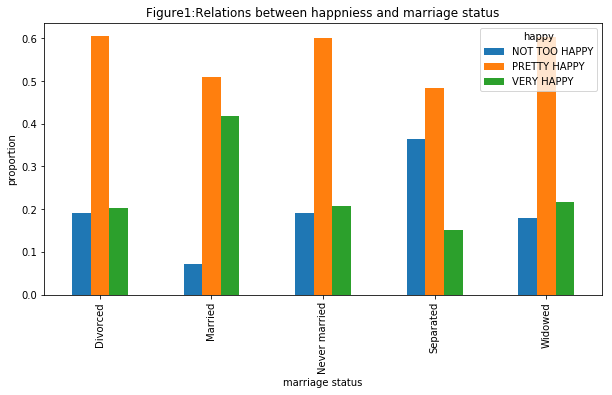

In [20]:
hap_mar = df.groupby(by=['marital'])['happy'].value_counts()
hap_mar = hap_mar.unstack()
hap_mar.loc['Divorced'] = hap_mar.loc['Divorced'].div(315)
hap_mar.loc['Married'] = hap_mar.loc['Married'].div(897)
hap_mar.loc['Never married'] = hap_mar.loc['Never married'].div(525)
hap_mar.loc['Separated'] = hap_mar.loc['Separated'].div(66)
hap_mar.loc['Widowed'] = hap_mar.loc['Widowed'].div(161)
ax =hap_mar.plot(kind='bar',figsize=(10, 5),title='Figure1:Relations between happniess and marriage status')
ax.set_ylabel("proportion")
ax.set_xlabel("marriage status")

### Marital status, sex and happiness

As we have already found that married couples are more likely to feel happy and sepreated people are the least happiest group, I am curious about whether female and male have different reaction to their marriage status. From the two bar plots below, we can see that the proportion of male and female's reaction to their marriage status are similar. The largest number of married female participants feel 'prety happy', the same with married male. And the largest number of seperated female and male feel pretty happy. Yet, when we observe the difference between 'pretty happy' and 'not too happy' for female and male in figure 3, we could find that difference for female is much obvious, which means higher proportion of seperated female feel 'not too happy' than seperated male. This finding needs further analysis as we did not draw the proportion directly. 

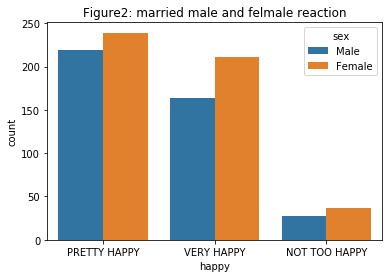

In [44]:
sns.countplot(x=df["happy"][df["marital"]== "Married"], hue="sex", data=df)
plt.title('Figure2: married male and felmale')

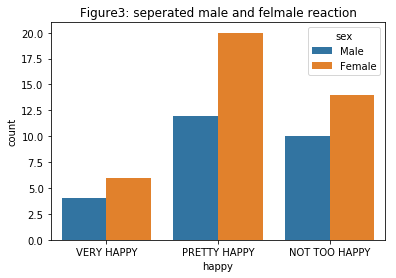

In [43]:
sns.countplot(x=df["happy"][df["marital"]== 'Separated'], hue="sex", data=df)
plt.title('Figure3: seperated male and felmale')

### Income and happiness

People tend to believe that individuals with higher income are happier than people with lower income. This thought is proven true as we could see from the following graphs. The highest income group, $150000 or over, has the highest self-reporting ‘very happy’ proportion than other groups. The rates of ‘very happy’ in the more decent income groups are obviously higher than that of people with lower income. In general, there is a positive correlation between happiness and income. The second graph of ‘not too happy’ also shows this positive.

From the two graphs, it could also be observed people with income between 4000 dollars and 7000 dollars are the least happiest groups.

Nevertheless, it is noticeable that the lowest income group is ‘outlier’. The proportion of self-claimed happiness in the lowest income group, 'under $1,000' is abnormally higher than other lower income groups. As for the reason, it could be the missing data of the vocation of people. For example, students and housewife might be included in the group with lower income. However, considering the total family income, these two groups of people might have a quite good financial condition, which explain the higher proportion of happiness in this group.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B6467A748>], dtype=object)

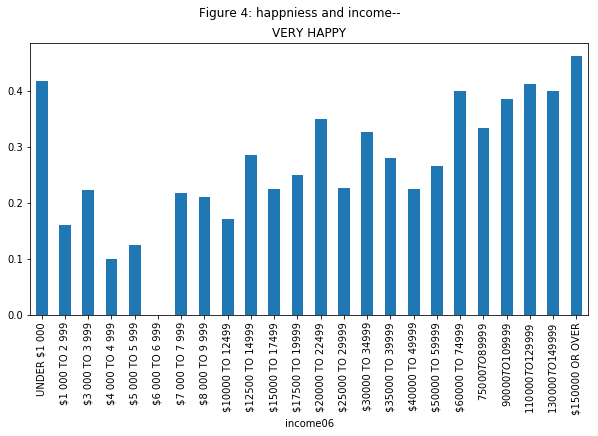

In [39]:
in_mar = df.groupby(by=['income06'])['happy'].value_counts()
in_mar = in_mar.unstack()
in_mar.head()
sumh = in_mar.sum(axis = 1)

a = in_mar.index.tolist()
for i in a:
    in_mar.loc[i] = in_mar.loc[i].div(sumh[i])
p = in_mar['VERY HAPPY']
p1 = p.reindex(index = ['UNDER $1 000','$1 000 TO 2 999','$3 000 TO 3 999','$4 000 TO 4 999',
                       '$5 000 TO 5 999','$6 000 TO 6 999','$7 000 TO 7 999','$8 000 TO 9 999', 
                       '$10000 TO 12499','$12500 TO 14999',  '$15000 TO 17499','$17500 TO 19999',
                       '$20000 TO 22499','$25000 TO 29999', '$30000 TO 34999','$35000 TO 39999',
                       '$40000 TO 49999','$50000 TO 59999','$60000 TO 74999','$75000 TO $89999',
                       '$90000 TO $109999','$110000 TO $129999','$130000 TO $149999','$150000 OR OVER'])

p1.T.plot.bar(subplots=True, figsize=(10, 5),title= 'Figure 4: happniess and income--')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B647B5198>], dtype=object)

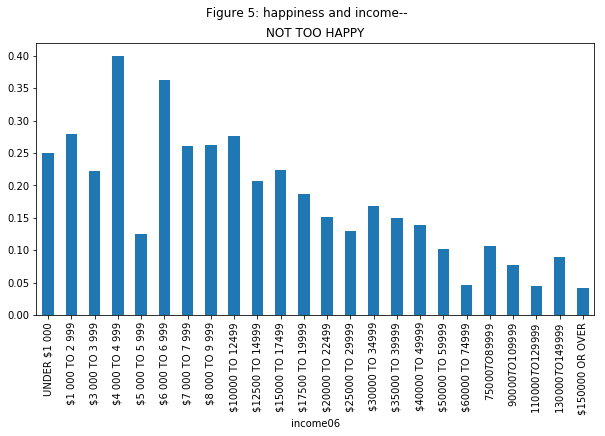

In [40]:
n = in_mar['NOT TOO HAPPY']
n1 = n.reindex(index = ['UNDER $1 000','$1 000 TO 2 999','$3 000 TO 3 999','$4 000 TO 4 999',
                       '$5 000 TO 5 999','$6 000 TO 6 999','$7 000 TO 7 999','$8 000 TO 9 999', 
                       '$10000 TO 12499','$12500 TO 14999',  '$15000 TO 17499','$17500 TO 19999',
                       '$20000 TO 22499','$25000 TO 29999', '$30000 TO 34999','$35000 TO 39999',
                       '$40000 TO 49999','$50000 TO 59999','$60000 TO 74999','$75000 TO $89999',
                       '$90000 TO $109999','$110000 TO $129999','$130000 TO $149999','$150000 OR OVER'])

n1.T.plot.bar(subplots=True, figsize=(10, 5),title= 'Figure 5: happiness and income--')

## Conclusion

The plots mentioned above are an example of the exploratory analysis providing an informative presentation of heterogeneity between happiness and income/marital status. After conducting EDA, I strongly believe that the relationship between happiness and income/ marriage status is largely expected. But we could not exaggerate or over-simplify their relations. Further statistical analysis is needed to validate the relations between seperated marital status, sex and happiness. What's more, it would be more convincing if we could analyze the data from previous years or years after 2012 to compare and examine the pattern we found.